In [76]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 16,
        'axes.labelsize': 16,
        'axes.titlesize': 18,
        'legend.fontsize': 16,
        'xtick.labelsize': 16,
        'ytick.labelsize': 16,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [77]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Final data\Values ALL.xlsx")


## Gray and Oostra standard curve

### Give a third order polynomial fit for each color

The range used on Gray and Oostra article for the standard curve was 6020–6340 Å, we can stablish just a green range (4970-5700 Å) for comparised and report all the color curves started on violet range.

For consistency, the standard curve is comparised only using the visible range for the solar flux atlas.

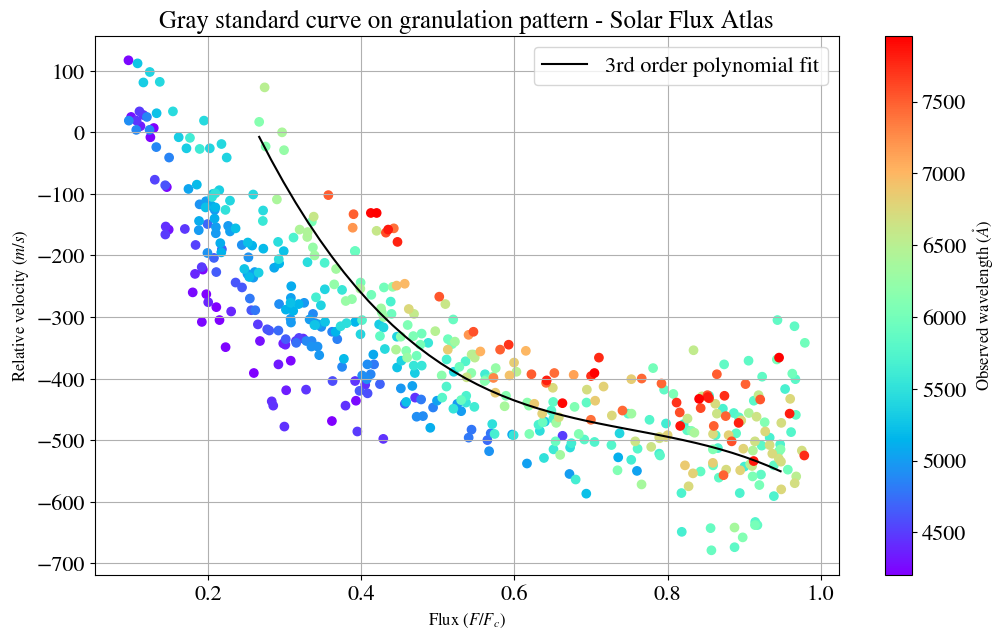

In [78]:
#Take the range from Gray and Oostra
values_VIS_standard = VIS_data[VIS_data['Observed wavelength'].between(6020,6340, inclusive='right')]

fig1, ax = plt.subplots(1,1,figsize=(12,7))

ax.set_title(r'Gray standard curve on granulation pattern - Solar Flux Atlas')

pol = Polynomial.fit(values_VIS_standard['Flux'],values_VIS_standard['Velocity'], 3)
param = pol.convert().coef
values_flux = np.linspace(min(values_VIS_standard['Flux']), max(values_VIS_standard['Flux']), len(values_VIS_standard['Flux']))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(VIS_data['Flux'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.plot(values_flux,flux_fit,color='k',label='3rd order polynomial fit')

ax.set_xlabel(r'Flux $(F/F_{c})$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.legend()
ax.grid()

# fig1.savefig('Standard curve_Gray.pdf')

The report is only for the specific range and shifted the curved +633 m/s

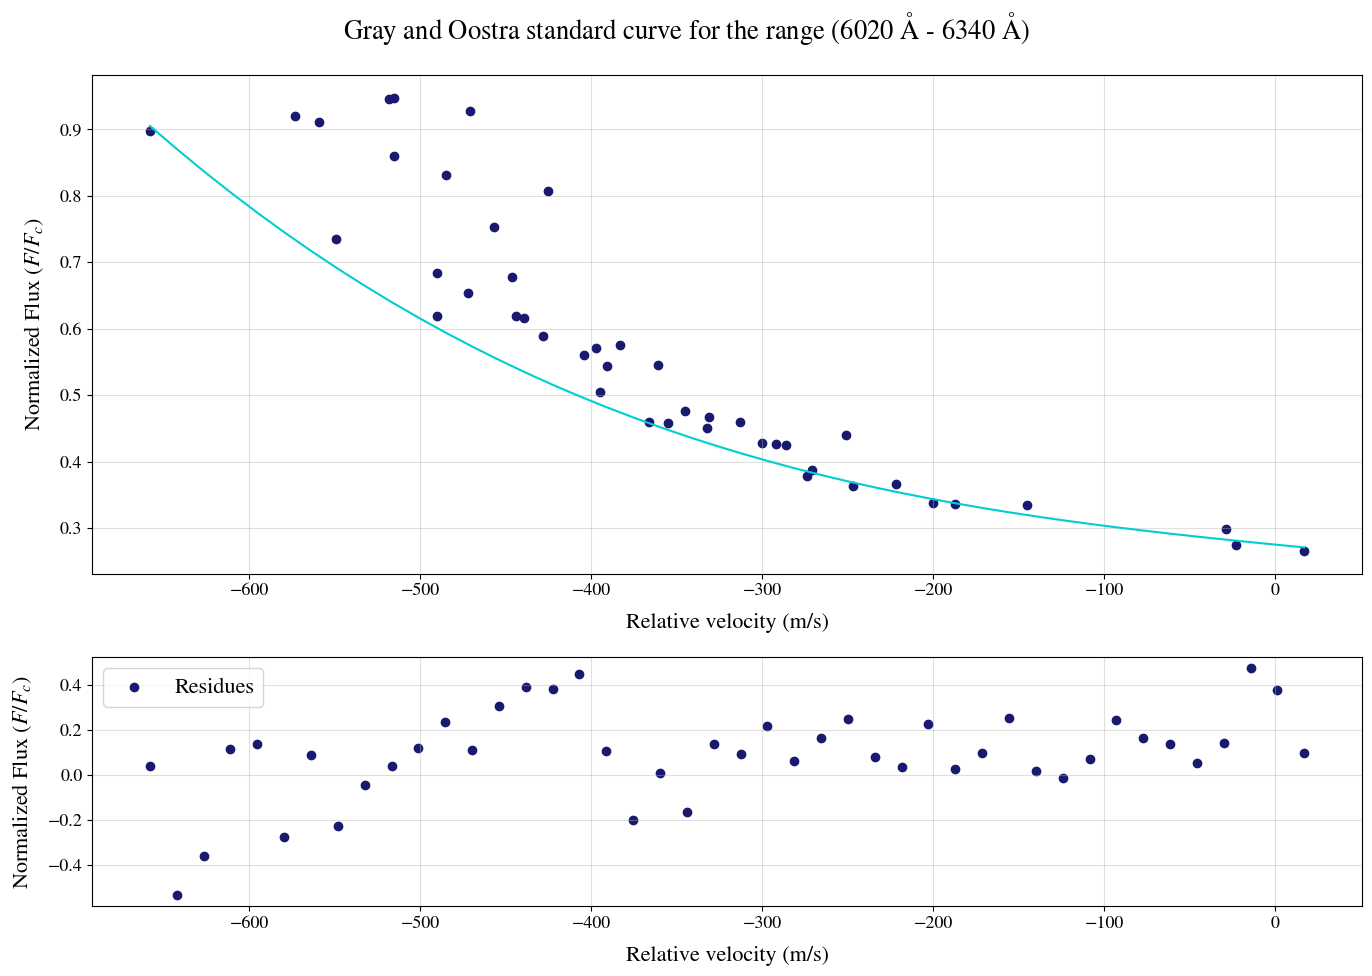

In [79]:
#In the report is given in function of the velocity
Gray_params = [ -0.1364*10**(-8),0.1731*10**(-6),-0.2521*10**(-3),0.2758]

values_fit = np.linspace(min(values_VIS_standard['Velocity']), max(values_VIS_standard['Velocity']), len(values_VIS_standard))
fit = np.polyval(Gray_params,values_fit)

#Calculate the residues
residuos = values_VIS_standard['Flux']-fit
std_flux = np.std(residuos) 

#Plot for fixed the zero point of velocity
fig2, axis = plt.subplots(2,1, figsize = (14, 10), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig2.suptitle(r'Gray and Oostra standard curve for the range (6020 $\mathrm{\AA}$ - 6340 $\mathrm{\AA}$)')

ax1.scatter(values_VIS_standard['Velocity'],values_VIS_standard['Flux'], color='midnightblue')
ax1.plot(values_fit,fit,c='darkturquoise',
    label= fr'$F/F_c$ = -{round(Gray_params[0]*1e9,4)} $\times 10^{{-9}}v^3$ +{round(Gray_params[1]*-1e6,4)}$\times 10^{{-6}}v^2$ - {round(Gray_params[2]*-1e3,4)} $\times 10^{{-3}}v$ + {round(Gray_params[3]*10,4)}')
ax1.set_ylabel(r'Normalized Flux $(F/F_{c})$',labelpad=10)
ax1.set_xlabel(r'Relative velocity (m/s)',labelpad=10)
ax1.grid(alpha=0.4)
ax1.tick_params(axis='both',labelsize=13)

ax2.scatter(values_fit,residuos,c='midnightblue',label='Residues')
ax2.set_xlabel(r'Relative velocity (m/s)',labelpad=10)
ax2.set_ylabel(r'Normalized Flux $(F/F_{c})$',labelpad=10)
ax2.grid(alpha=0.4)
ax2.legend()
ax2.tick_params(axis='both',labelsize=13)


fig2.tight_layout()

# fig2.savefig('Standard curve gray')

In [80]:
param

array([ 1024.50084464, -5515.98259757,  6984.65788667, -3079.10441021])

### Standard curves for visible range

In [81]:
#Separate for range in colors for color fits

values_ALL = [ ALL_data[ALL_data['Observed wavelength'].between(3800, 4270, inclusive='right') ], #Purple
                ALL_data[ALL_data['Observed wavelength'].between(4270, 4760, inclusive='right')], #Blue
                ALL_data[ALL_data['Observed wavelength'].between(4760, 4970, inclusive='right')], #Cyan
                ALL_data[ALL_data['Observed wavelength'].between(4970, 5700, inclusive='right')], #Green 
                ALL_data[ALL_data['Observed wavelength'].between(5700, 5810, inclusive='right')], #Yellow
                ALL_data[ALL_data['Observed wavelength'].between(5810, 6180, inclusive='right')], #Orange
                ALL_data[ALL_data['Observed wavelength'].between(6180, 7500, inclusive='right')]] #Red

#colors for the plot
colors_fit = [r'3800 $\mathrm{\AA}$ - 4270 $\mathrm{\AA}$',r'4270 $\mathrm{\AA}$ - 4760 $\mathrm{\AA}$',r'4760 $\mathrm{\AA}$ - 4970 $\mathrm{\AA}$',
              r'4970 $\mathrm{\AA}$ - 5700 $\mathrm{\AA}$',r'5700 $\mathrm{\AA}$ - 5810 $\mathrm{\AA}$',r'5810 $\mathrm{\AA}$ - 6180 $\mathrm{\AA}$',r'6180 $\mathrm{\AA}$ - 7500 $\mathrm{\AA}$']
colors = ['darkviolet','darkblue','darkcyan','darkgreen','gold','darkorange','darkred']
colors_wave = [np.mean(np.arange(3800, 4270,1)),np.mean(np.arange(4270, 4760,1)),np.mean(np.arange(4760, 4970,1)),
               np.mean(np.arange(4970, 5700,1)),np.mean(np.arange(5700, 5810,1)),np.mean(np.arange(5810, 6180,1)),
               np.mean(np.arange(6180, 7500,1))]


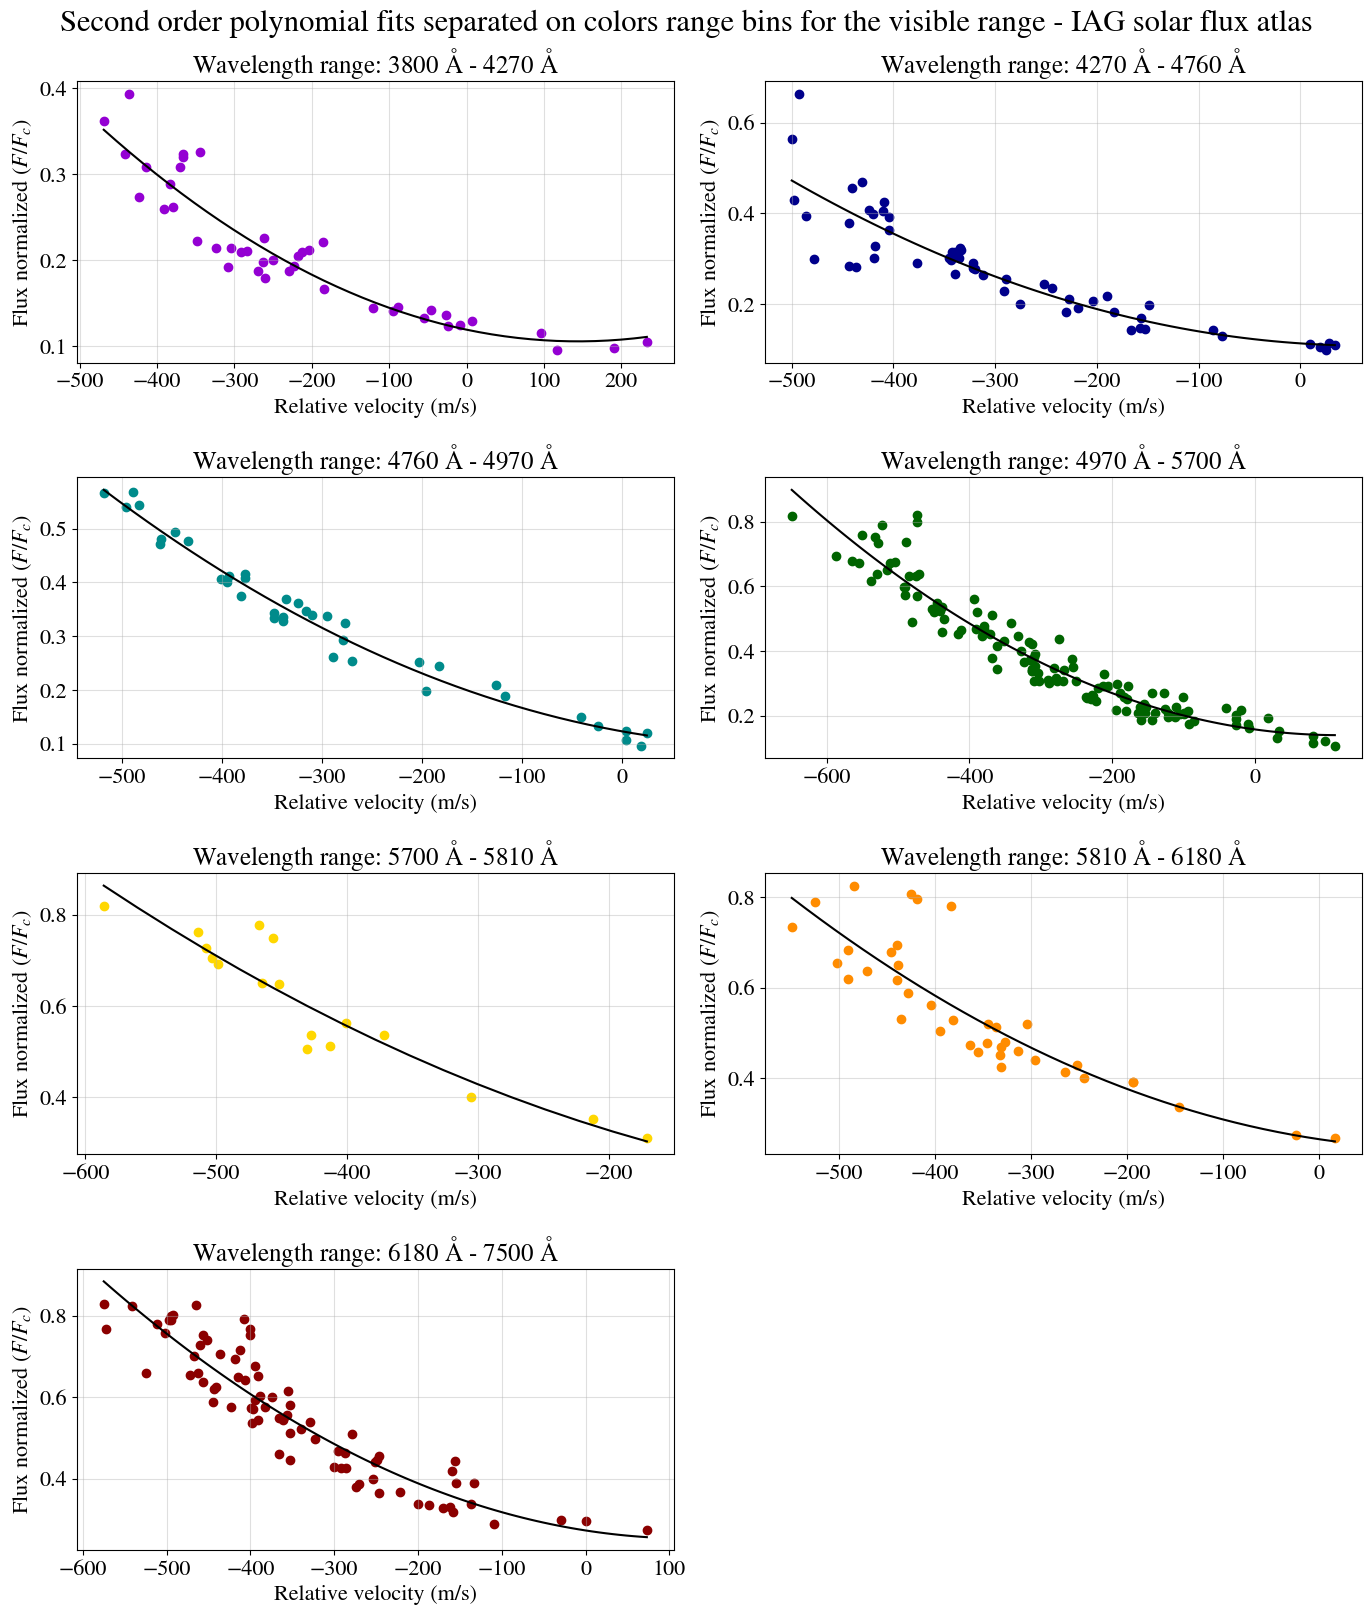

In [82]:
fig5, axes = plt.subplots(5,2,figsize=(14,20))
fig5.suptitle('Second order polynomial fits separated on colors range bins for the visible range - IAG solar flux atlas',fontsize=22)
axes = axes.flatten()

cov_error = []
r2 = []
fits = []
values_param = []
#Plot the cuadratic fit for each color
for i, ax in enumerate(axes):
        if i < len(values_ALL):
                data = values_ALL[i][values_ALL[i]['Flux'].between(0,0.83)]

                #Made a polynomial first order fit
                param, cov = np.polyfit(data['Velocity'],data['Flux'], 2,cov=True)
                values_fit = np.linspace(min(data['Velocity']), max(data['Velocity']), len(data['Velocity']))
                fit = np.polyval(param,values_fit)
                # Standard error
                error = np.sqrt(np.diag(cov))
                #Calcule the pearson coeffcient where R2=r2
                r = data['Velocity'].corr(pd.Series(fit, index=data.index))

                cov_error.append(pd.DataFrame(error))
                r2.append(r**2)
                fits.append([values_fit,fit])
                values_param.append(pd.DataFrame(param))

                ax.plot(values_fit,fit, color='k')
                ax.scatter(data['Velocity'],data['Flux'],c=colors[i],label=rf'$F/F_c$ = {round(param[0]*1e7,2)} $\times 10^{{-7}}$ $v^2$ - {round(param[1]*-1e4,2)} $\times 10^{{-4}}$ $v$ + {round(param[2],2)}')
                ax.set_title(r'Wavelength range: {}'.format(colors_fit[i]))
                ax.grid(alpha=0.4)

                ax.set_ylabel(r'Flux normalized $(F/F_{c})$')
                ax.set_xlabel(r'Relative velocity (m/s)')

        else:
                ax.remove()

fig5.tight_layout()
# fig5.savefig('color curves')


In [83]:
#Parameters and their error
param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
param.columns = ['Cuadratic','Lineal','Shift']
param['Error Cuadratic'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[0]
param['Error Lineal'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[1]
param['Error Shift'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[2]
param['Range'] = colors_wave
param

,Cuadratic,Lineal,Shift,Error Cuadratic,Error Lineal,Error Shift,Range
0,6.543126e-07,-0.000189,0.119098,1.226896e-07,0.000043,0.006852,4034.5
1,1.132448e-06,-0.000152,0.113453,3.043728e-07,0.000154,0.018838,4514.5
2,1.030765e-06,-0.000334,0.122773,1.472809e-07,0.000073,0.008567,4864.5
3,1.292572e-06,-0.000303,0.157714,1.380664e-07,0.000078,0.010348,5334.5
4,1.331460e-06,-0.000343,0.205256,1.087509e-06,0.000813,0.145148,5754.5
5,1.190184e-06,-0.000319,0.264653,5.474597e-07,0.000329,0.050274,5994.5
6,1.292170e-06,-0.000319,0.272969,2.923035e-07,0.000178,0.026768,6839.5


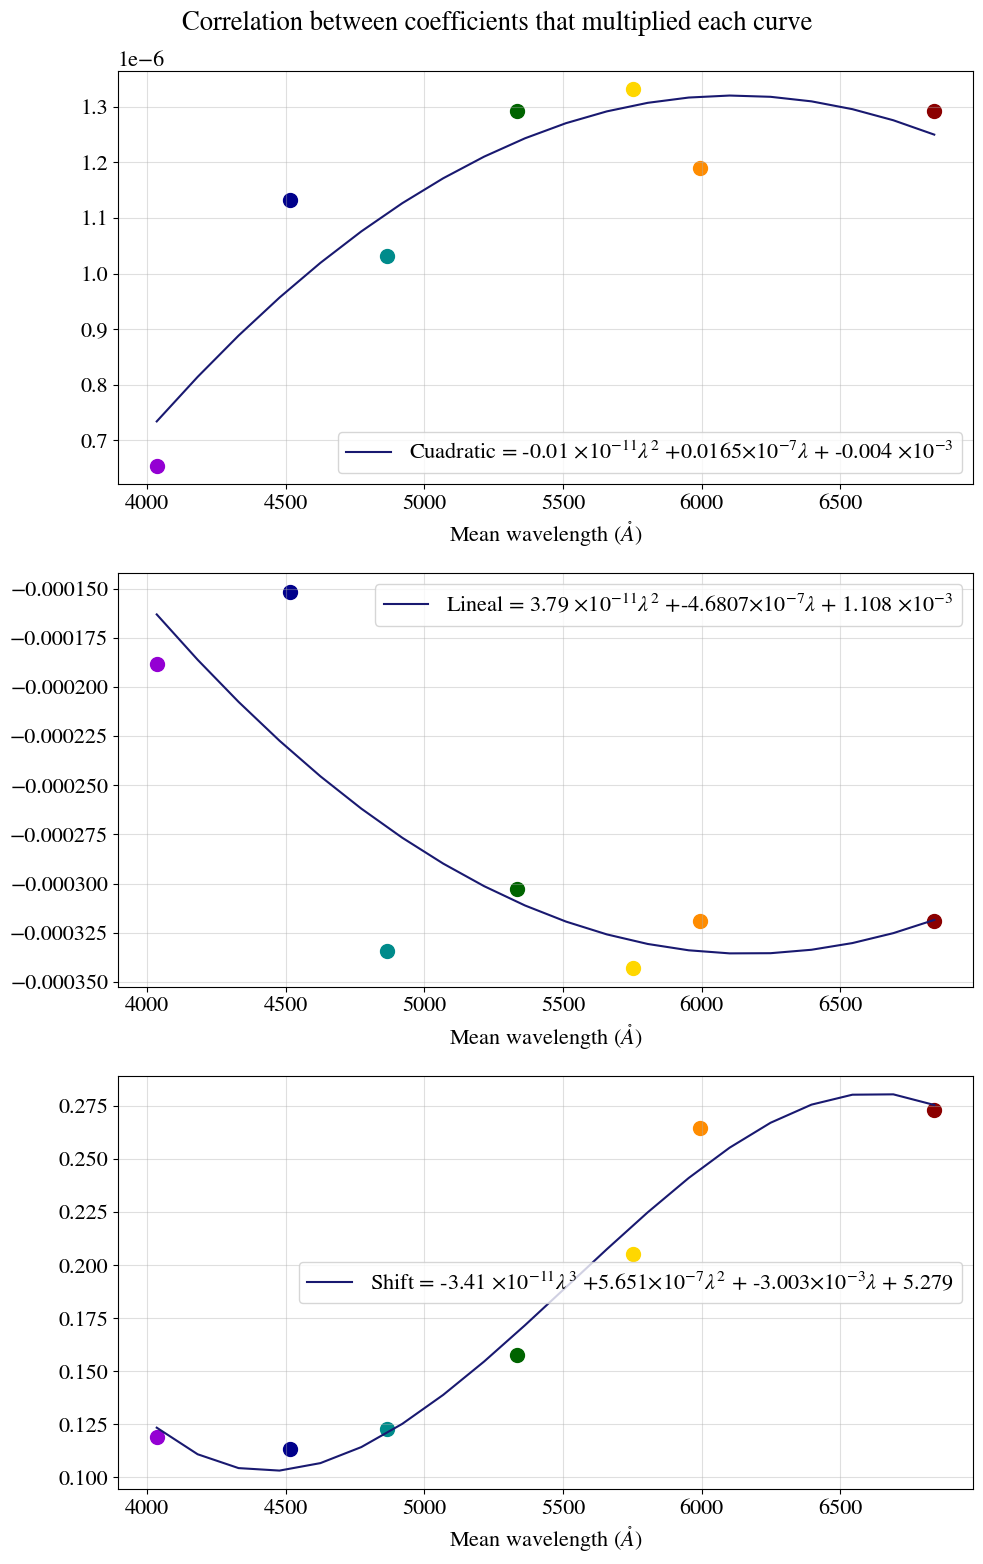

In [84]:
fig3, axes = plt.subplots(3,1,figsize=(10,16))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

for i in range(len(colors_wave)):
    ax1.scatter(colors_wave[i],param['Cuadratic'][i],marker='o',c=colors[i],s=100)
    ax2.scatter(colors_wave[i],param['Lineal'][i],marker='o',c=colors[i],s=100)
    ax3.scatter(colors_wave[i],param['Shift'][i],marker='o',c=colors[i],s=100)

#Made a polynomial first order fit
param0, cov = np.polyfit(colors_wave,param['Shift'], 3,cov=True)
values_fit = np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param0,values_fit)

ax3.plot(values_fit,fit,c='midnightblue',label=rf'Shift = {round(param0[0]*1e11,2)} $\times 10^{{-11}}\lambda^3$ +{round(param0[1]*1e7,3)}$\times 10^{{-7}}\lambda^2$ + {round(param0[2]*1e3,3)}$\times 10^{{-3}}\lambda$ + {round(param0[3],3)}')

#Made a polynomial first order fit
param1, cov1 = np.polyfit(colors_wave,param['Lineal'], 2,cov=True)
values_fit= np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param1,values_fit)

ax2.plot(values_fit,fit,c='midnightblue',label=rf'Lineal = {round(param1[0]*1e11,2)} $\times 10^{{-11}}\lambda^2 $ +{round(param1[1]*1e7,4)}$\times 10^{{-7}}\lambda$ + {round(param1[2]*1e3,3)} $\times 10^{{-3}}$')

#Made a polynomial first order fit
param2, cov = np.polyfit(colors_wave,param['Cuadratic'], 2,cov=True)
values_fit = np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param2,values_fit)

ax1.plot(values_fit,fit,c='midnightblue',label=rf'Cuadratic = {round(param2[0]*1e11,2)} $\times 10^{{-11}}\lambda^2 $ +{round(param2[1]*1e7,4)}$\times 10^{{-7}}\lambda$ + {round(param2[2]*1e3,3)} $\times 10^{{-3}}$')

fig3.suptitle('Correlation between coefficients that multiplied each curve')

ax1.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
ax2.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
ax3.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
# ax.set_ylabel(r'Coefficient')
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
ax3.legend()
fig3.tight_layout()

# fig3.savefig('color coeficients')

In [85]:
param1

array([ 3.79498963e-11, -4.68070072e-07,  1.10758928e-03])

Take as reference the green curve and scaling all the others, we see that all the coeficients that multiplied the green curve have the same values, making one coeficient general to scale the curve

In [86]:
# The reference point is the green part, the color coefficient is waht are in the table
scale_coeff = pd.DataFrame()
scale_coeff['2nd order'] = param['Cuadratic']/param['Cuadratic'].iloc[3]
scale_coeff['1st order'] = param['Lineal']/param['Lineal'].iloc[3]
scale_coeff['Shift'] = param['Shift']/param['Shift'].iloc[3]
scale_coeff['Range'] = colors_fit


scale_coeff

,2nd order,1st order,Shift,Range
0,0.506210,0.622926,0.755154,3800 $\mathrm{\AA}$ - 4270 $\mathrm{\AA}$
1,0.876120,0.501187,0.719363,4270 $\mathrm{\AA}$ - 4760 $\mathrm{\AA}$
2,0.797453,1.104352,0.778458,4760 $\mathrm{\AA}$ - 4970 $\mathrm{\AA}$
3,1.000000,1.000000,1.000000,4970 $\mathrm{\AA}$ - 5700 $\mathrm{\AA}$
4,1.030086,1.133592,1.301451,5700 $\mathrm{\AA}$ - 5810 $\mathrm{\AA}$
5,0.920788,1.054179,1.678062,5810 $\mathrm{\AA}$ - 6180 $\mathrm{\AA}$
6,0.999689,1.055002,1.730788,6180 $\mathrm{\AA}$ - 7500 $\mathrm{\AA}$


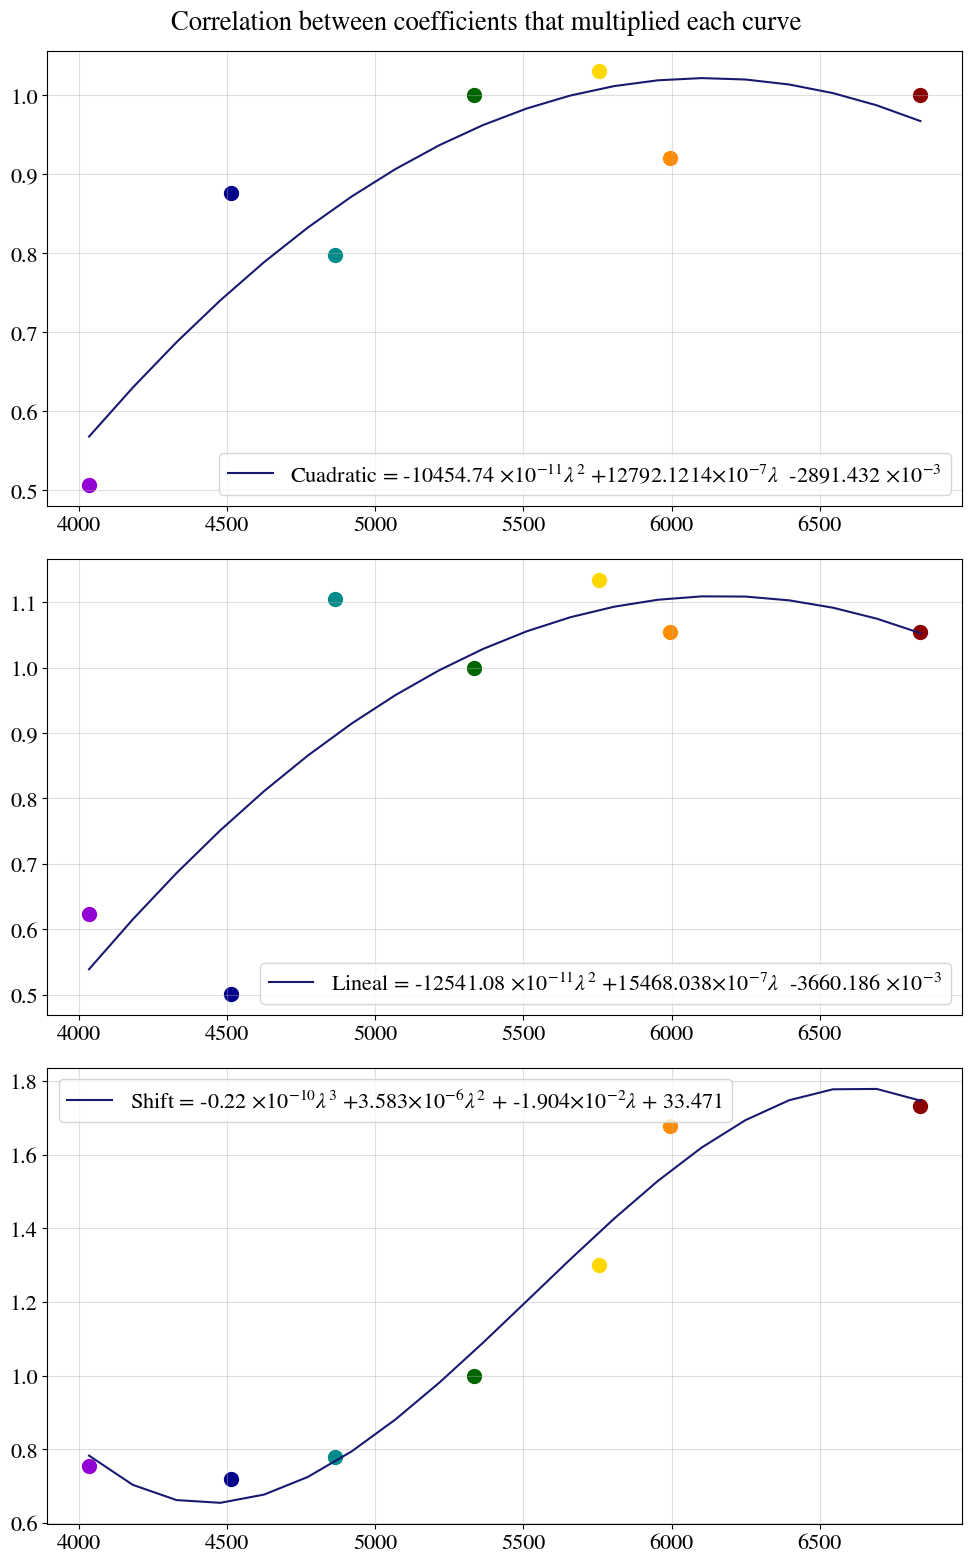

In [87]:
fig3, axes = plt.subplots(3,1,figsize=(10,16))
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]

for i in range(len(colors_wave)):
    ax1.scatter(colors_wave[i],scale_coeff['2nd order'][i],marker='o',c=colors[i],s=100)
    ax2.scatter(colors_wave[i],scale_coeff['1st order'][i],marker='o',c=colors[i],s=100)
    ax3.scatter(colors_wave[i],scale_coeff['Shift'][i],marker='o',c=colors[i],s=100)

#Made a polynomial first order fit
param0, cov = np.polyfit(colors_wave,scale_coeff['Shift'], 3,cov=True)
values_fit = np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param0,values_fit)

ax3.plot(values_fit,fit,c='midnightblue',label=rf'Shift = {round(param0[0]*1e9,2)} $\times 10^{{-10}}\lambda^3$ +{round(param0[1]*1e6,3)}$\times 10^{{-6}}\lambda^2$ + {round(param0[2]*1e2,3)}$\times 10^{{-2}}\lambda$ + {round(param0[3],3)}')

#Made a polynomial first order fit
param1, cov = np.polyfit(colors_wave,scale_coeff['1st order'], 2,cov=True)
values_fit = np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param1,values_fit)

ax2.plot(values_fit,fit,c='midnightblue',label=rf'Lineal = {round(param1[0]*1e11,2)} $\times 10^{{-11}}\lambda^2 $ +{round(param1[1]*1e7,4)}$\times 10^{{-7}}\lambda$  {round(param1[2]*1e3,3)} $\times 10^{{-3}}$')

#Made a polynomial first order fit
param2, cov = np.polyfit(colors_wave,scale_coeff['2nd order'], 2,cov=True)
values_fit = np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param2,values_fit)

ax1.plot(values_fit,fit,c='midnightblue',label=rf'Cuadratic = {round(param2[0]*1e11,2)} $\times 10^{{-11}}\lambda^2 $ +{round(param2[1]*1e7,4)}$\times 10^{{-7}}\lambda$  {round(param2[2]*1e3,3)} $\times 10^{{-3}}$')

fig3.suptitle('Correlation between coefficients that multiplied each curve')

# ax.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
# ax.set_ylabel(r'Coefficient')
ax1.grid(alpha = 0.4)
ax2.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
ax1.legend()
ax2.legend()
ax3.legend()
fig3.tight_layout()

# fig3.savefig('color coeficients')

In [88]:
param0

array([-2.15942761e-10,  3.58303297e-06, -1.90430635e-02,  3.34713222e+01])

### With shift

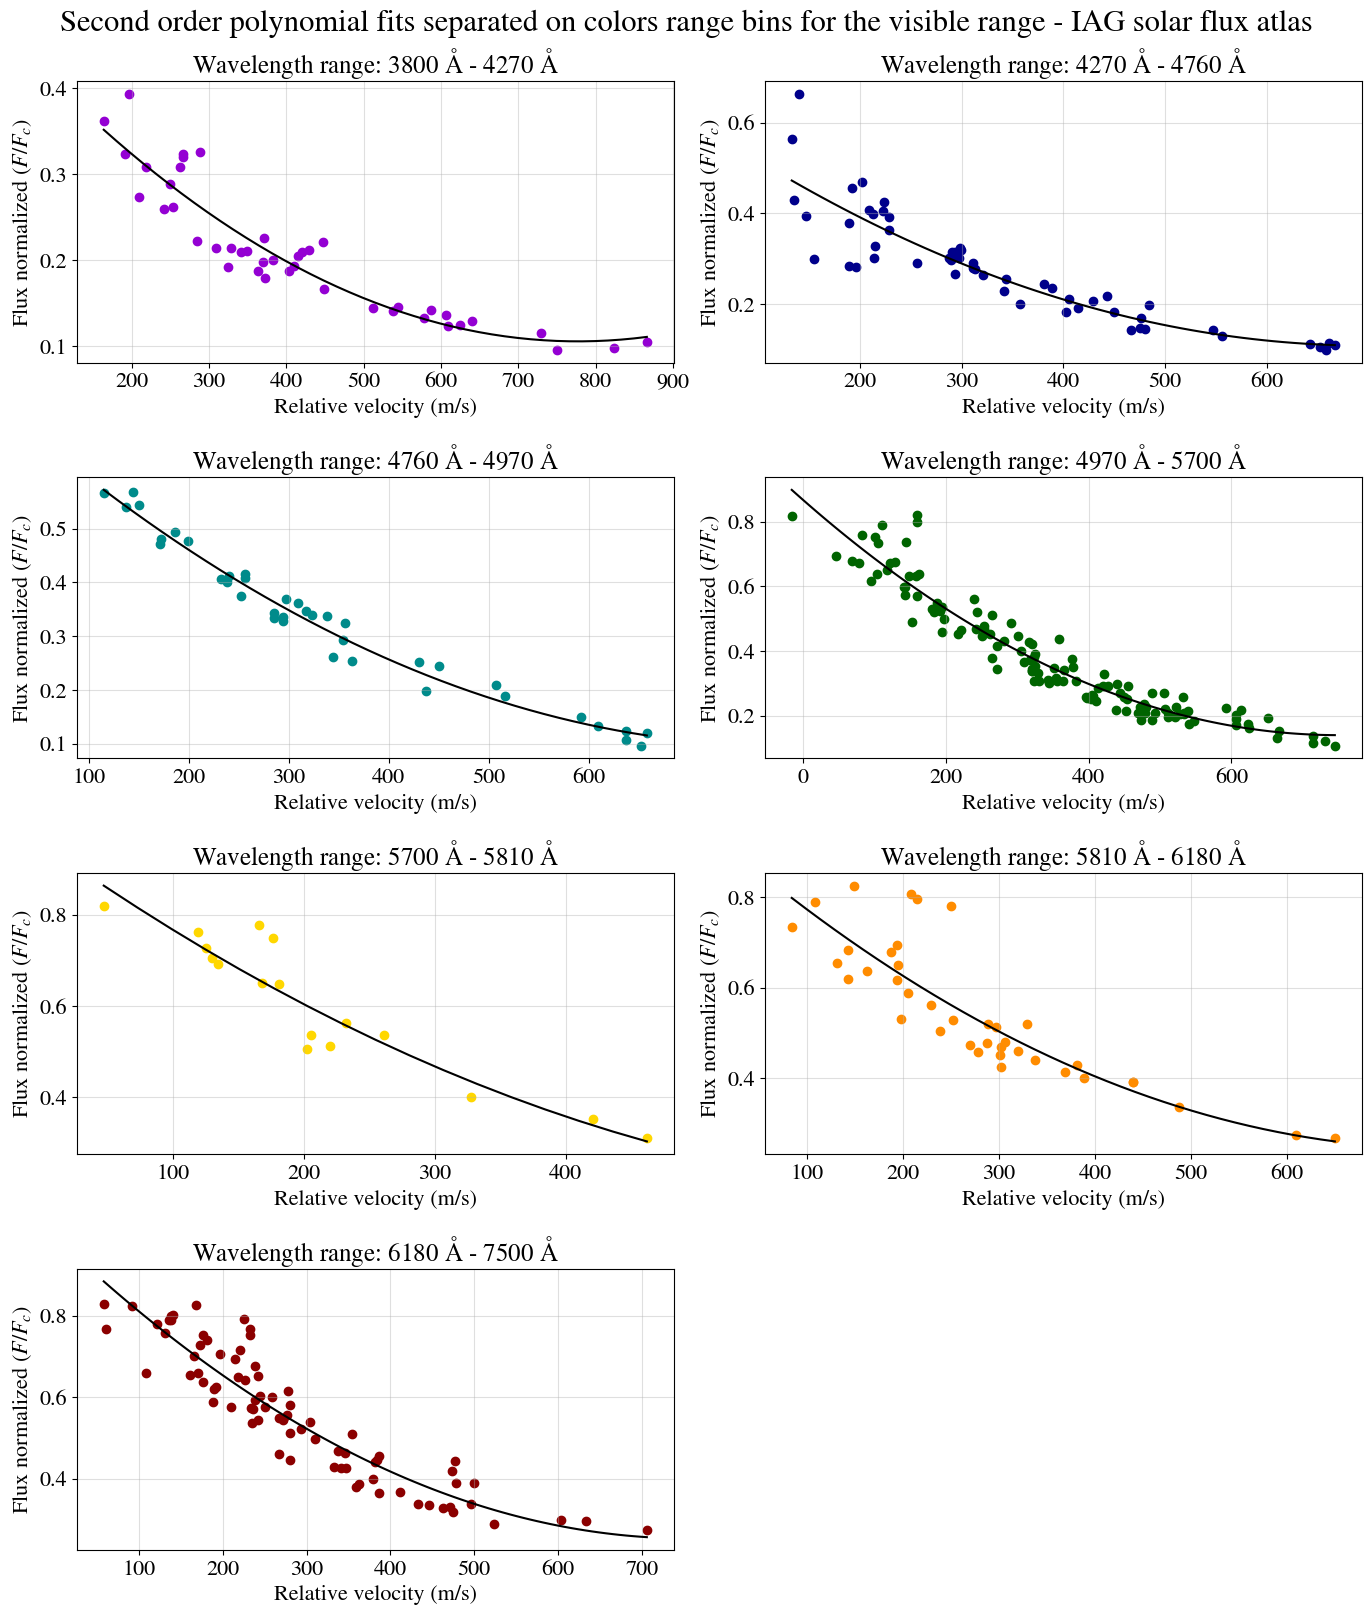

In [89]:
fig5, axes = plt.subplots(5,2,figsize=(14,20))
fig5.suptitle('Second order polynomial fits separated on colors range bins for the visible range - IAG solar flux atlas',fontsize=22)
axes = axes.flatten()

cov_error = []
r2 = []
fits = []
values_param = []
#Plot the cuadratic fit for each color
for i, ax in enumerate(axes):
        if i < len(values_ALL):
                data = values_ALL[i][values_ALL[i]['Flux'].between(0,0.83)]

                #Made a polynomial first order fit
                param, cov = np.polyfit(data['Velocity']+633,data['Flux'], 2,cov=True)
                values_fit = np.linspace(min(data['Velocity']+633), max(data['Velocity']+633), len(data['Velocity']))
                fit = np.polyval(param,values_fit)
                # Standard error
                error = np.sqrt(np.diag(cov))
                #Calcule the pearson coeffcient where R2=r2
                r = data['Velocity'].corr(pd.Series(fit, index=data.index))

                cov_error.append(pd.DataFrame(error))
                r2.append(r**2)
                fits.append([values_fit,fit])
                values_param.append(pd.DataFrame(param))

                ax.plot(values_fit,fit, color='k')
                ax.scatter(data['Velocity']+633,data['Flux'],c=colors[i],label=rf'$F/F_c$ = {round(param[0]*1e7,2)} $\times 10^{{-7}}$ $v^2$ - {round(param[1]*-1e4,2)} $\times 10^{{-4}}$ $v$ + {round(param[2],2)}')
                ax.set_title(r'Wavelength range: {}'.format(colors_fit[i]))
                ax.grid(alpha=0.4)

                ax.set_ylabel(r'Flux normalized $(F/F_{c})$')
                ax.set_xlabel(r'Relative velocity (m/s)')

        else:
                ax.remove()

fig5.tight_layout()
# fig5.savefig('color curves')


In [90]:
#Parameters and their error
param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
param.columns = ['Cuadratic','Lineal','Shift']
param['Error Cuadratic'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[0]
param['Error Lineal'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[1]
param['Error Shift'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[2]
param['Range'] = colors_fit

param

,Cuadratic,Lineal,Shift,Error Cuadratic,Error Lineal,Error Shift,Range
0,6.543126e-07,-0.001017,0.500595,1.226896e-07,0.000122,0.026924,3800 $\mathrm{\AA}$ - 4270 $\mathrm{\AA}$
1,1.132448e-06,-0.001585,0.663215,3.043728e-07,0.000243,0.043252,4270 $\mathrm{\AA}$ - 4760 $\mathrm{\AA}$
2,1.030765e-06,-0.001639,0.747327,1.472809e-07,0.000119,0.020880,4760 $\mathrm{\AA}$ - 4970 $\mathrm{\AA}$
3,1.292572e-06,-0.001939,0.867182,1.380664e-07,0.000105,0.018029,4970 $\mathrm{\AA}$ - 5700 $\mathrm{\AA}$
4,1.331460e-06,-0.002029,0.955896,1.087509e-06,0.000591,0.068967,5700 $\mathrm{\AA}$ - 5810 $\mathrm{\AA}$
5,1.190184e-06,-0.001826,0.943474,5.474597e-07,0.000391,0.062190,5810 $\mathrm{\AA}$ - 6180 $\mathrm{\AA}$
6,1.292170e-06,-0.001955,0.992811,2.923035e-07,0.000206,0.032571,6180 $\mathrm{\AA}$ - 7500 $\mathrm{\AA}$


In [91]:
# The reference point is the green part, the color coefficient is waht are in the table
scale_coeff = pd.DataFrame()
scale_coeff['2nd order'] = param['Cuadratic']/param['Cuadratic'].iloc[3]
scale_coeff['1st order'] = param['Lineal']/param['Lineal'].iloc[3]
scale_coeff['Shift'] = param['Shift']/param['Shift'].iloc[3]
scale_coeff['Mean coeff'] = np.mean(np.array([scale_coeff['2nd order'],scale_coeff['1st order'],scale_coeff['Shift']]),axis=0)
scale_coeff['Range'] = colors_fit


scale_coeff

,2nd order,1st order,Shift,Mean coeff,Range
0,0.506210,0.524425,0.577266,0.535967,3800 $\mathrm{\AA}$ - 4270 $\mathrm{\AA}$
1,0.876120,0.817607,0.764793,0.819507,4270 $\mathrm{\AA}$ - 4760 $\mathrm{\AA}$
2,0.797453,0.845348,0.861788,0.834863,4760 $\mathrm{\AA}$ - 4970 $\mathrm{\AA}$
3,1.000000,1.000000,1.000000,1.000000,4970 $\mathrm{\AA}$ - 5700 $\mathrm{\AA}$
4,1.030086,1.046239,1.102302,1.059542,5700 $\mathrm{\AA}$ - 5810 $\mathrm{\AA}$
5,0.920788,0.941605,1.087977,0.983457,5810 $\mathrm{\AA}$ - 6180 $\mathrm{\AA}$
6,0.999689,1.008321,1.144871,1.050960,6180 $\mathrm{\AA}$ - 7500 $\mathrm{\AA}$


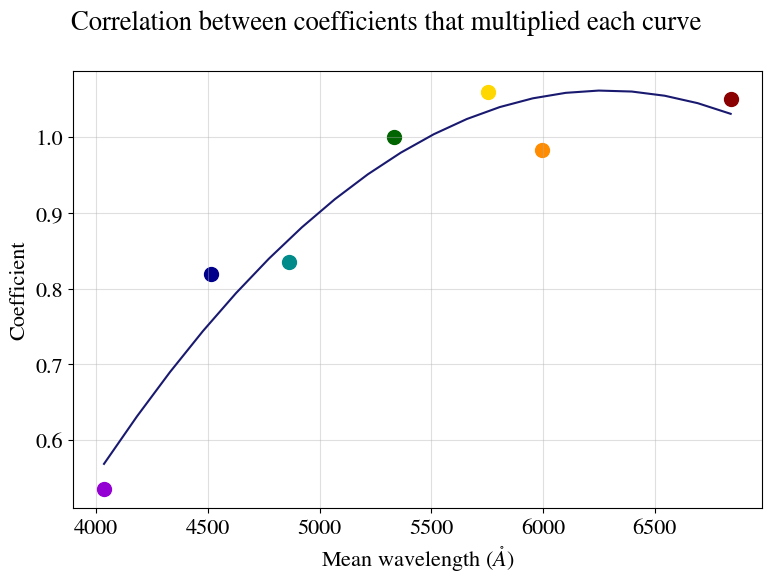

In [92]:
fig3, ax = plt.subplots(1,1,figsize=(8,6))

for i in range(len(colors_wave)):
    ax.scatter(colors_wave[i],scale_coeff['Mean coeff'][i],marker='o',c=colors[i],s=100)

#Made a polynomial first order fit
param, cov = np.polyfit(colors_wave,scale_coeff['Mean coeff'], 2,cov=True)
values_fit = np.linspace(min(colors_wave), max(colors_wave), 20)
fit = np.polyval(param,values_fit)

ax.plot(values_fit,fit,c='midnightblue')
fig3.suptitle('Correlation between coefficients that multiplied each curve')

ax.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
ax.set_ylabel(r'Coefficient')
ax.grid(alpha = 0.4)

fig3.tight_layout()
# fig3.savefig('color coeficients')

In [93]:
param

array([-9.78945733e-08,  1.22929976e-03, -2.79767354e+00])

In [94]:
# data = values_ALL[3][values_ALL[3]['Flux'].between(0,0.83)] #rango verde
# paramg, cov = np.polyfit(data['Velocity'],data['Flux'], 2,cov=True)

# fig5, axes = plt.subplots(5,2,figsize=(14,20))
# axes = axes.flatten()
# for i, ax in enumerate(axes):
#         if i < len(values_ALL):
#                 values_fit = np.linspace(min(data['Velocity']), max(data['Velocity']), len(data['Velocity']))
#                 fit = np.polyval(paramg*scale_coeff['Mean coeff'][i],values_fit)

#                 ax.plot(values_fit,fit, color='k')
#                 c_data = values_ALL[i][values_ALL[i]['Flux'].between(0,0.83)]
#                 ax.scatter(c_data['Velocity'],c_data['Flux'],c=colors[i])
#                 ax.set_title(r'Wavelength range: {}'.format(colors_fit[i]))
#                 ax.grid(alpha=0.4)

#                 ax.set_ylabel(r'Flux normalized $(F/F_{c})$')
#                 ax.set_xlabel(r'Relative velocity (m/s)')
                
#         else:
#                 ax.remove()

# fig5.tight_layout()

### Standard curves for near infrared range

In [95]:
values_NIR = [ ALL_data[ALL_data['Observed wavelength'].between(7000, 9500, inclusive='right') ],
                ALL_data[ALL_data['Observed wavelength'].between(9500, 11500, inclusive='right')], 
                ALL_data[ALL_data['Observed wavelength'].between(11500, 14000, inclusive='right')], 
                ALL_data[ALL_data['Observed wavelength'].between(14000, 16000, inclusive='right')],
                ALL_data[ALL_data['Observed wavelength'].between(16000, 19000, inclusive='right')]]

#colors for the plot
colors_nir = ['darkred','brown','chocolate','indianred','darksalmon']

#colors for the plot
colors_fit_nir = [r'7000 $\mathrm{\AA}$ - 9500 $\mathrm{\AA}$',r'9500 $\mathrm{\AA}$ - 11500 $\mathrm{\AA}$',r'11500 $\mathrm{\AA}$ - 14000 $\mathrm{\AA}$',
              r'14000 $\mathrm{\AA}$ - 16000 $\mathrm{\AA}$',r'16000 $\mathrm{\AA}$ - 19000 $\mathrm{\AA}$']

colors_wave_nir = [np.mean(np.arange(7000, 9500,1)),np.mean(np.arange(9500, 11500,1)),np.mean(np.arange(11500, 14000,1)),
               np.mean(np.arange(14000, 16000,1)),np.mean(np.arange(16000, 19000,1))]


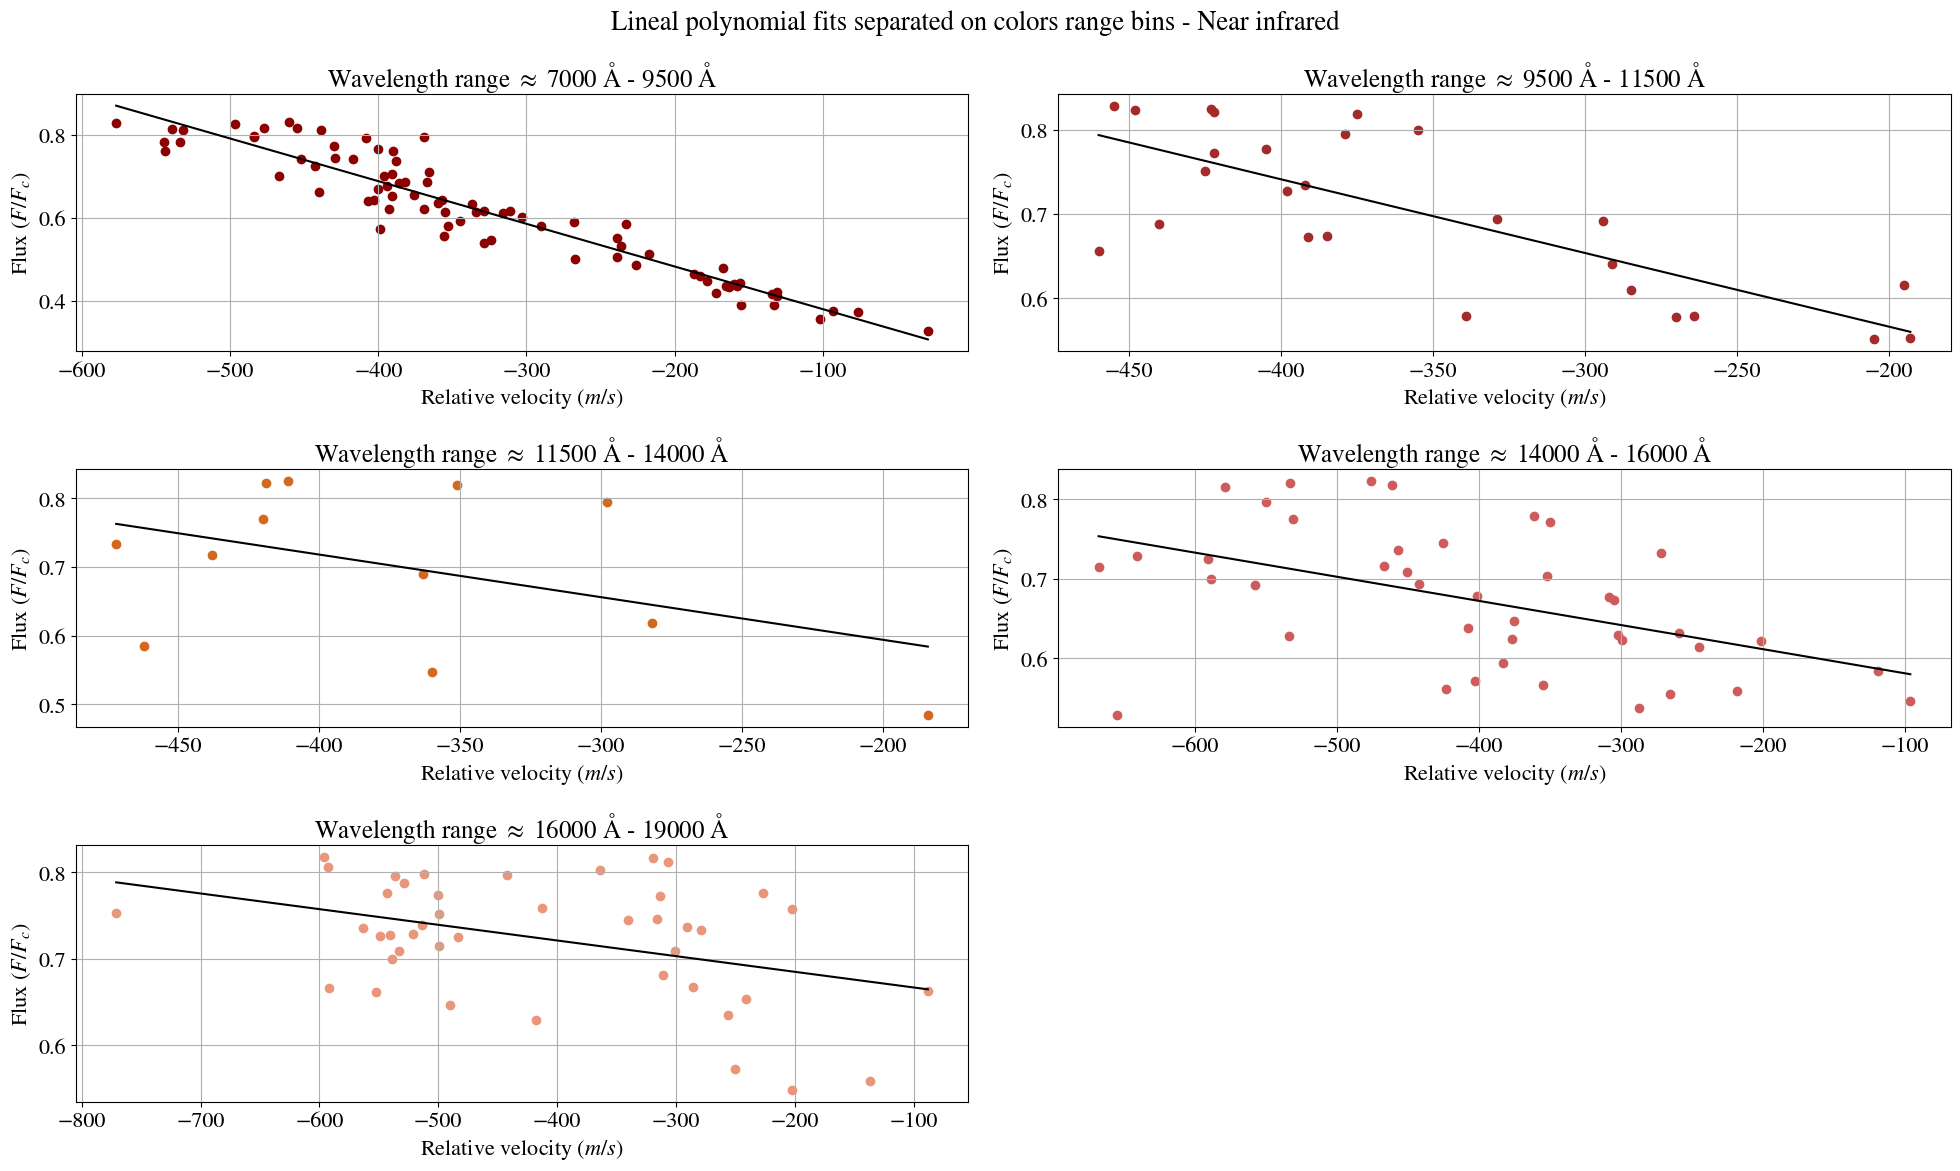

In [96]:
fig5, axes = plt.subplots(3,2,figsize=(20,12))
fig5.suptitle('Lineal polynomial fits separated on colors range bins - Near infrared')
axes = axes.flatten()

cov_error = []
r2 = []
fits = []
values_param = []

#Plot the cuadratic fit for each color
for i, ax in enumerate(axes):
        if i < len(values_NIR):
                data = values_NIR[i][values_NIR[i]['Flux'].between(0,0.83)]
        
                ax.scatter(data['Velocity'],data['Flux'],c=colors_nir[i])
                ax.set_title(r'Wavelength range $\approx$ {}'.format(colors_fit_nir[i]))
                ax.grid()
                
                #Made a polynomial first order fit
                param, cov = np.polyfit(data['Velocity'],data['Flux'], 1,cov=True)
                values_fit = np.linspace(min(data['Velocity']), max(data['Velocity']), len(data))
                fit = np.polyval(param,values_fit)
                # Standard error
                error = np.sqrt(np.diag(cov))
                #Calcule the pearson coeffcient where R2=r2
                r = data['Velocity'].corr(pd.Series(fit, index=data.index))

                cov_error.append(pd.DataFrame(error))
                r2.append(r**2)
                fits.append([values_fit,fit])
                values_param.append(pd.DataFrame(param))

                ax.plot(values_fit,fit, color='k')

                ax.set_ylabel(r'Flux $(F/F_{c})$')
                ax.set_xlabel(r'Relative velocity $(m/s)$')
        else:
                ax.remove()

fig5.tight_layout()

# fig5.savefig('color curves nir')

In [97]:
#Parameters and their error
param = pd.concat(values_param,axis=1).T.reset_index(drop=True)
param.columns = ['Lineal','Shift']
param['Error Lineal'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[0]
param['Error Shift'] = pd.concat(cov_error,axis=1).T.reset_index(drop=True)[1]
param['Range'] = colors_wave_nir

param

,Lineal,Shift,Error Lineal,Error Shift,Range
0,-0.001028,0.276968,0.000039,0.013782,8249.5
1,-0.000875,0.391186,0.000152,0.055238,10499.5
2,-0.000621,0.469690,0.000392,0.149210,12749.5
3,-0.000303,0.550961,0.000085,0.036374,14999.5
4,-0.000181,0.648775,0.000066,0.028858,17499.5


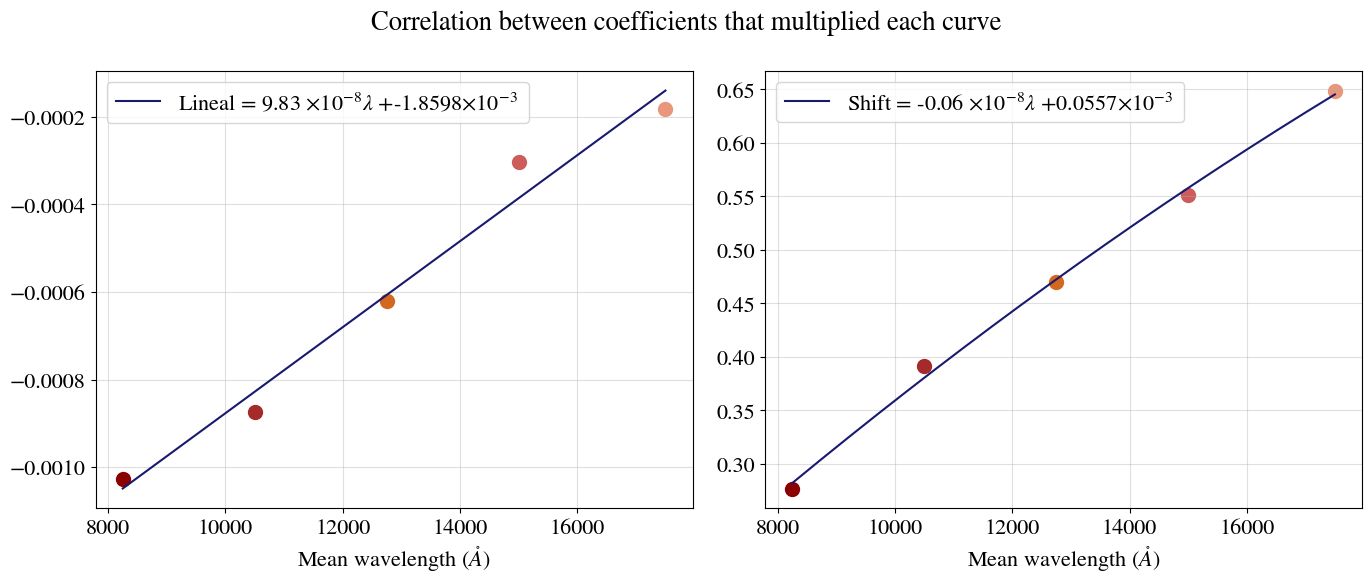

In [101]:
fig3, axes = plt.subplots(1,2,figsize=(14,6))
ax2 = axes[0]
ax3 = axes[1]

for i in range(len(colors_wave_nir)):
    ax2.scatter(colors_wave_nir[i],param['Lineal'][i],marker='o',c=colors_nir[i],s=100)
    ax3.scatter(colors_wave_nir[i],param['Shift'][i],marker='o',c=colors_nir[i],s=100)

#Made a polynomial first order fit
param1, cov = np.polyfit(colors_wave_nir,param['Lineal'], 1,cov=True)
values_fit = np.linspace(min(colors_wave_nir), max(colors_wave_nir), 20)
fit = np.polyval(param1,values_fit)

ax2.plot(values_fit,fit,c='midnightblue',label=rf'Lineal = {round(param1[0]*1e8,2)} $\times 10^{{-8}}\lambda $ +{round(param1[1]*1e3,4)}$\times 10^{{-3}}$ ')

#Made a polynomial first order fit
param2, cov = np.polyfit(colors_wave_nir,param['Shift'], 2,cov=True)
values_fit = np.linspace(min(colors_wave_nir), max(colors_wave_nir), 20)
fit = np.polyval(param2,values_fit)

ax3.plot(values_fit,fit,c='midnightblue',label=rf'Shift = {round(param2[0]*1e8,2)} $\times 10^{{-8}}\lambda $ +{round(param2[1]*1e3,4)}$\times 10^{{-3}}$ ')

fig3.suptitle('Correlation between coefficients that multiplied each curve')

ax2.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
ax3.set_xlabel(r'Mean wavelength ($\mathring{A}$)')
# ax.set_ylabel(r'Coefficient')

ax2.grid(alpha = 0.4)
ax3.grid(alpha = 0.4)
ax2.legend()
ax3.legend()
fig3.tight_layout()

# fig3.savefig('color coeficients')

In [99]:
param1

array([ 9.82891632e-08, -1.85977717e-03])